# Predicting heart disease using Machine Learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart diesease?

# 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repo
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also another version of it available on Kaggle
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project

# 4. Features
** Create data dictionary **
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is  typically cause for concern
* chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
* thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [1]:
# Preparing the tools
# We are going to use pandas,Numpy and matplotlib for data analysis and manipulation

In [3]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [88]:
# Importing all the tools we need for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to make sure our plots appear in the notebook
%matplotlib inline
# Models from Scikit-Learn
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


# Load data

In [9]:
df = pd.read_csv("heart-disease.csv")
print(df.shape)
df.head(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Data exploration (exploratory data analysis or EDA)
1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add,change or remove features to get more out of your data?

In [11]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
# to find out how many of each class is there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

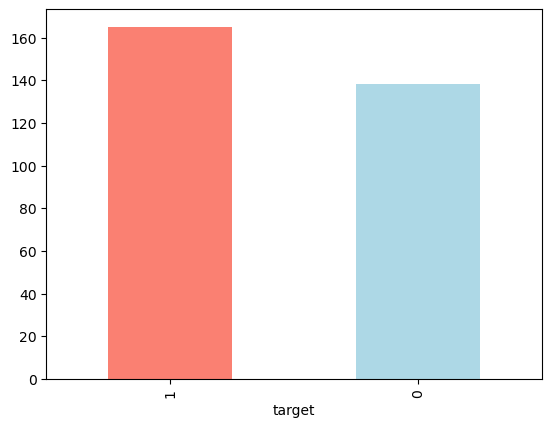

In [14]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon","lightblue"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# to find if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease frequency according to sex

In [20]:
df.sex.value_counts()
# 1 - male
# 2 - female

sex
1    207
0     96
Name: count, dtype: int64

In [21]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

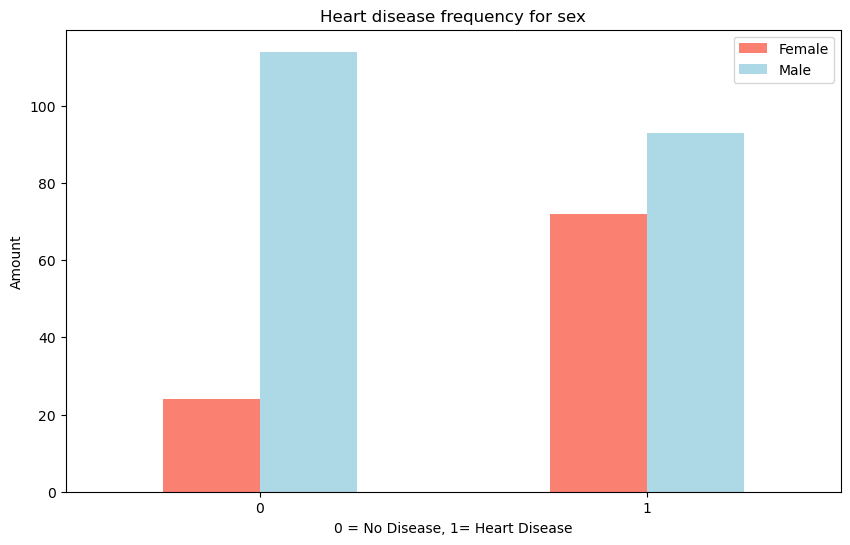

In [23]:
# Creating a list of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", color = ["salmon","lightblue"],figsize = (10,6))
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1= Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0)

In [25]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

# Age vs Max Heart Rate for Heart Disease

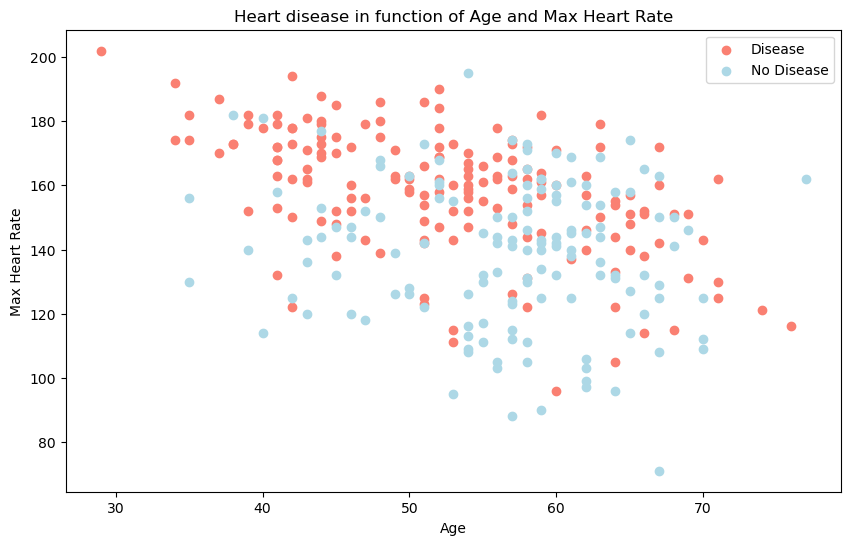

In [30]:
#creating another figure
plt.figure(figsize = (10,6))

# scatter with positive examples
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target==1],
           c = "salmon")

# scatter with negative examples
plt.scatter(df.age[df.target ==0],
           df.thalach[df.target==0],
           c = "lightblue");

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

<Axes: ylabel='Frequency'>

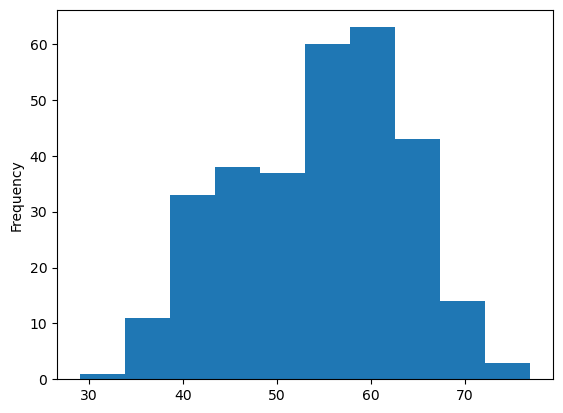

In [31]:
# checking the distribution of the age column with a histogram
df.age.plot.hist()

 # Heart Disease Frequency per Chest Pain Type

cp - chest pain type 0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical angina: chest pain not related to heart 2: Non-anginal pain: typically esophageal spasms (non heart related) 3: Asymptomatic: chest pain not showing signs of disease

In [33]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


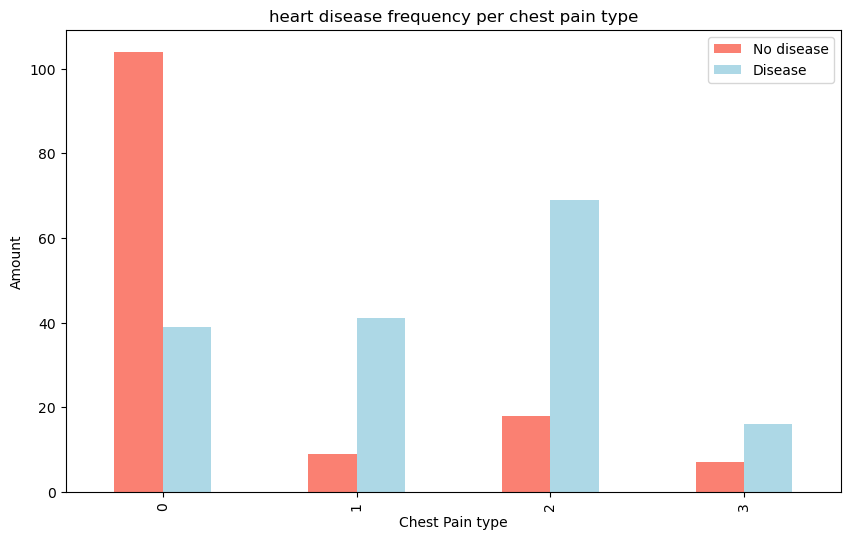

In [36]:
pd.crosstab(df.cp,df.target).plot(kind = "bar", color = ["salmon","lightblue"],figsize = (10,6))

# adding titles
plt.title("heart disease frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"]);


In [37]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


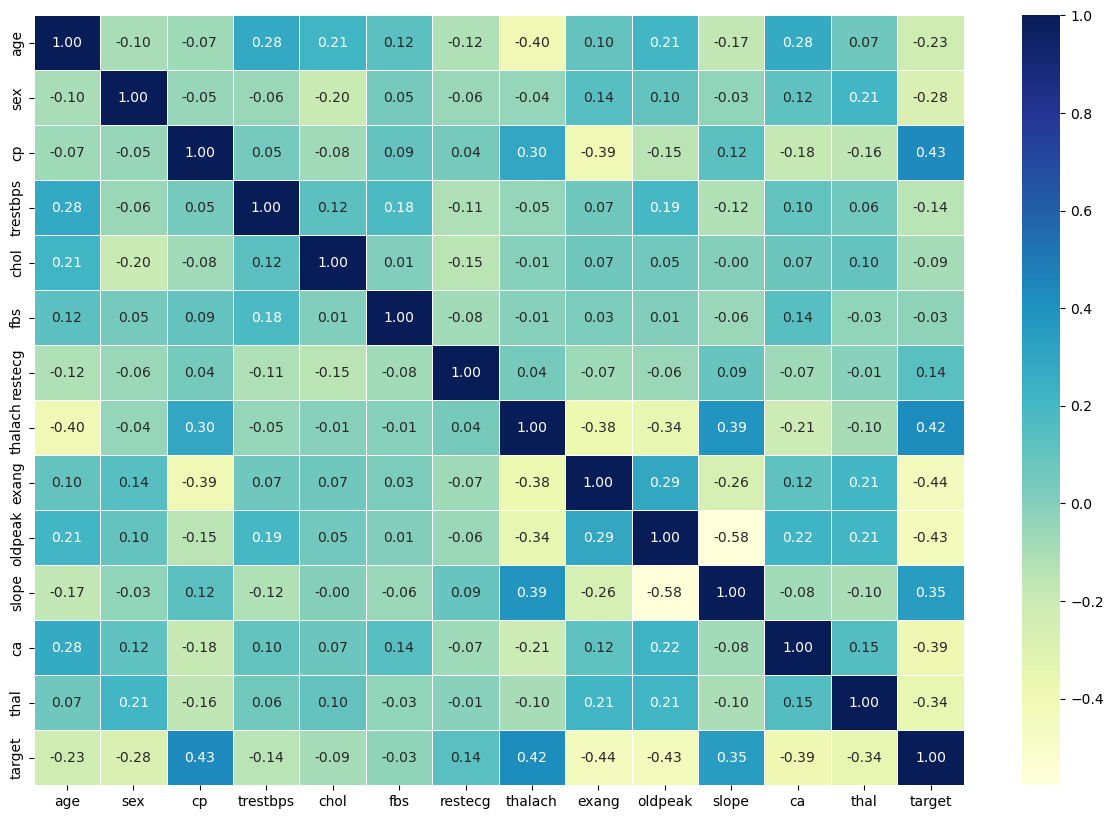

In [40]:
# making our correlation matrix visual
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax= sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f",cmap = "YlGnBu");

# 5. Modelling

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# creating X and Y
x = df.drop("target", axis = 1)
y = df["target"]

np.random.seed(42)
# Splitting the data into test and train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [43]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [44]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

We're going to try 3 different machine learning models
1. Logistic Regression - used for classification rather than regression
2. K-Nearest Classifier
3. RandomForestClassifier

In [45]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# creating a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different scikit-learn machine learning models
    """
    # set random seed
    np.random.seed(42)
    model_scores = {}
    #loop through models
    for name,model in models.items():
        model.fit(x_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [48]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

/Users/dipitmadan/Documents/AI_ML_Course/Classification-Project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [49]:
# From the above scores, we can figure out that Logistic regression has the best accuracy
# We can hypertune the model, to increase the accuracy

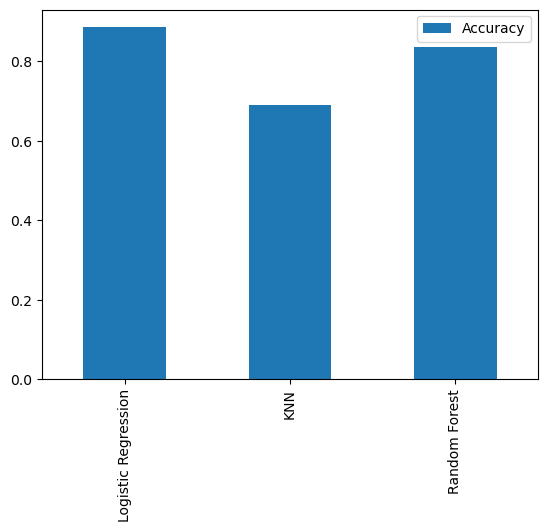

In [50]:
# Model comparison
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

Now we have a baseline model, and the models first predictions arent always accurate

Next steps:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under ROC curve

# Hyperparameter tuning(by hand)

In [52]:
# Let's tune KNN
train_scores = []
test_scores = []
# creating a list of n_neighbors
neighbors = range(1,21)
# Setup KNN instance
knn = KNeighborsClassifier()

#loop through different N-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the algorithm
    knn.fit(x_train,y_train)

    # update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    #update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [55]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [56]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

# Hyperparameter Tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier

  using RandomizedSearchCV

In [72]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {"c":np.logspace(-4,4,20),
               "solver":["liblinear"]}
# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [70]:
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions = log_reg_grid,cv = 5, n_iter = 30)

# Fitup random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)


/Users/dipitmadan/Documents/AI_ML_Course/Classification-Project/env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [64]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [65]:
# Now we've tuned LogisticRegresion(), lets do the same for RandomForestClassifier()

In [73]:
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}
# Setup random seed
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions = rf_grid,cv = 5, n_iter =20)

#fit random hyperparamter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [75]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [77]:
rs_rf.score(x_test,y_test) # results have improved from 83.6% to 86.88%

0.8688524590163934

# Tuning Hyperparameters using GridSearchCV
Since our logistic regression model provides the best score so far, we will try to improve it using GridSearchCV

In [78]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid = log_reg_grid, cv = 5, verbose = True) 

# fitting the model
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [79]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# 6. Evaluation
Evaluating our machine learning model beyond accuracy:
* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score
   

In [81]:
# Making predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
y_preds.size

61

In [ ]:
# ROC curve is obtained by plotting true positive rate against false positive rate
"""
1. True positive = model predicts 1 when truth is 1
2. True negative = model predicts 0 when truth is 0
3. False postive = model predicts 1 when truth is 0
4. False negative = model predicts 0 when truth is 1
"""

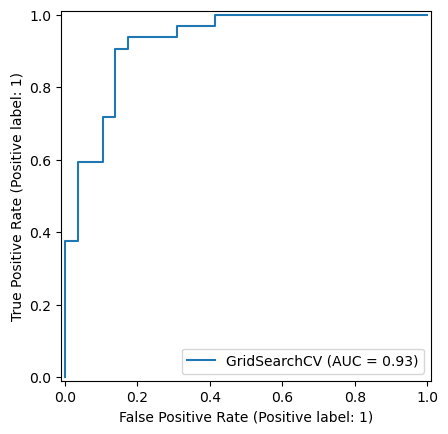

In [92]:
# Plot ROC curve and calculate AUC metric
roc_display = RocCurveDisplay.from_estimator(gs_log_reg,x_test, y_test)


In [93]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [94]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,25,4
1,3,29


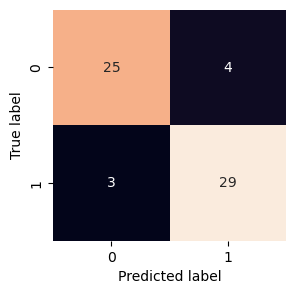

In [95]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [96]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [97]:
# the above classification report is based on a single test-train split
# for more accurate results lets cross-validate our dataset

 # Calculate Evaluation metric using Cross-Validation
 We're goint to calculate the precision,recall and f1_score after cross_validating

In [98]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [105]:
# creating new classifier
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [109]:
# cross- validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,x,y,cv=5,scoring = "accuracy")
cv_acc, cv_acc.mean()

(array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 0.8446994535519124)

In [110]:
# cross- validated precision
cv_pr = cross_val_score(clf,x,y,cv=5,scoring = "precision")
cv_pr, cv_pr.mean()

(array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 0.8207936507936507)

In [111]:
# cross- validated recall
cv_rc = cross_val_score(clf,x,y,cv=5,scoring = "recall")
cv_rc, cv_rc.mean()

(array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 0.9212121212121213)

   Accuracy  Precision    Recall
0  0.819672   0.775000  0.939394
1  0.901639   0.885714  0.939394
2  0.868852   0.857143  0.909091
3  0.883333   0.861111  0.939394
4  0.750000   0.725000  0.878788


<Axes: >

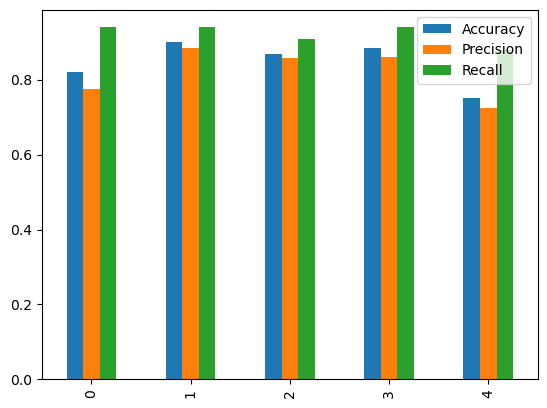

In [116]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_pr,"Recall":cv_rc})
print(cv_metrics)
cv_metrics.plot.bar()

# Feature Importance
Another way of asking which features contributed most to the outcome of the model

In [117]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [121]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [122]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

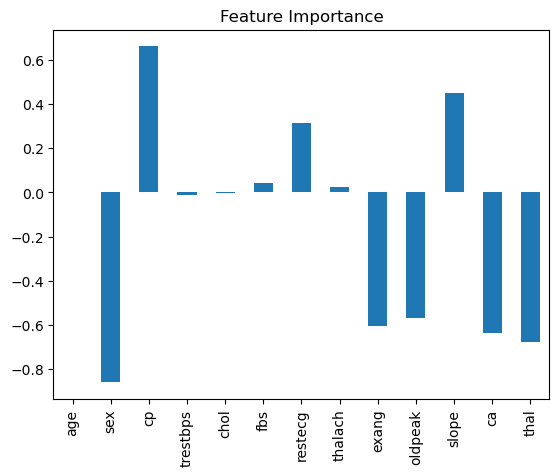

In [123]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);